In [ ]:
import os
from datetime import timedelta

import biosppy as bp
import numpy as np
import pandas as pd
from scipy import signal

import hrv_features
import hrv

from scipy.signal import welch, resample
from scipy.interpolate import interp1d

In [ ]:
patient = '365'

seizure_features = pd.read_parquet('data\\features_p' + patient + '_seizure.parquet')
baseline_features = pd.read_parquet('data\\features_p413_baseline.parquet')
seizures = pd.read_csv('data\\seizure_label_p'+patient, index_col=0)
seizure_dates = pd.to_datetime(seizures['Date'], dayfirst=True)
print(seizures)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(seizure_features['t0'], seizure_features['meanrr'])
plt.vlines(seizure_dates, seizure_features['meanrr'].min(), seizure_features['meanrr'].max())

In [ ]:
def standardise(sig):

    return (sig - np.mean(sig)) / np.std(sig)

def smooth(sig):

    return bp.signals.tools.smoother(sig, size=6)['signal']

In [ ]:
seizure_features.columns

In [ ]:
i = 0
feat = 'tinn'
for seiz in sorted(set(seizure_features['label'])):

    it = int(float(seiz.split('seizure')[-1]))
    print(seiz, it)
    seiz_table = seizure_features.loc[seizure_features['label']==seiz]
    xrange = (seiz_table['t0'] - seiz_table['t0'].iloc[0]).astype('timedelta64[s]')
    try:
        f = interp1d(x=xrange, y= smooth((seiz_table[feat].values)), kind='quadratic')
        xnew = np.arange(0, xrange.iloc[-1], int(xrange.iloc[-1]/100))
        ynew = f(xnew)
    # plt.plot(seiz_seg['t0'], smooth(standardise(seiz_seg['lf_hf'].values)))
        plt.plot(xnew, ynew)
    except:
        plt.plot(seiz_table['t0'], seiz_table[feat])

    seiz_dates = [(sd-seiz_table['t0'].iloc[0]).total_seconds() for sd in seizure_dates if (sd < seiz_table['t0'].iloc[-1]) & (sd > seiz_table['t0'].iloc[0])]
    print(seiz_dates)
    print(seizures.iloc[it]['ILAE'])
    print(seiz_table['t0'].iloc[0], seiz_table['t0'].iloc[-1])

    plt.vlines(seiz_dates, ynew.min(), ynew.max())
    plt.show()


In [ ]:
def standardise(sig):

    return (sig - np.mean(sig)) / np.std(sig)

def smooth(sig):

    return bp.signals.tools.smoother(sig, size=6)['signal']

In [ ]:
seizure_features.columns

In [ ]:
i = 0
feat = 'tinn'
for seiz in sorted(set(seizure_features['label'])):

    it = int(float(seiz.split('seizure')[-1]))
    print(seiz, it)
    seiz_table = seizure_features.loc[seizure_features['label']==seiz]
    xrange = (seiz_table['t0'] - seiz_table['t0'].iloc[0]).astype('timedelta64[s]')
    try:
        f = interp1d(x=xrange, y= smooth((seiz_table[feat].values)), kind='quadratic')
        xnew = np.arange(0, xrange.iloc[-1], int(xrange.iloc[-1]/100))
        ynew = f(xnew)
    # plt.plot(seiz_seg['t0'], smooth(standardise(seiz_seg['lf_hf'].values)))
        plt.plot(xnew, ynew)
    except:
        plt.plot(seiz_table['t0'], seiz_table[feat])

    seiz_dates = [(sd-seiz_table['t0'].iloc[0]).total_seconds() for sd in seizure_dates if (sd < seiz_table['t0'].iloc[-1]) & (sd > seiz_table['t0'].iloc[0])]
    print(seiz_dates)
    print(seizures.iloc[it]['ILAE'])
    print(seiz_table['t0'].iloc[0], seiz_table['t0'].iloc[-1])

    plt.vlines(seiz_dates, ynew.min(), ynew.max())
    plt.show()


In [ ]:
seizure_dates

In [38]:
seizure_features.columns

Index(['meanrr', 'rmssd', 'nn50', 'pnn50', 'sdnn', 'hti', 'tinn', 'ulf_pwr',
       'ulf_peak', 'ulf_rpwr', 'vlf_pwr', 'vlf_peak', 'vlf_rpwr', 'lf_pwr',
       'lf_peak', 'lf_rpwr', 'lfnupwr', 'hf_pwr', 'hf_peak', 'hf_rpwr',
       'hfnupwr', 'vhf_pwr', 'vhf_peak', 'vhf_rpwr', 'lf_hf', 's', 'sd1',
       'sd2', 'sd12', 'sd21', 'sampen', 'dfa_a1', 'dfa_a2', 'd2', 'hrmin',
       'hrmax', 'hrminmax', 'hravg', 't0', 't1', 'label'],
      dtype='object')

seizure0.0 0
[3599.573508]
FUnk
2019-10-04 17:35:02.426491650 2019-10-04 18:37:32.426491650


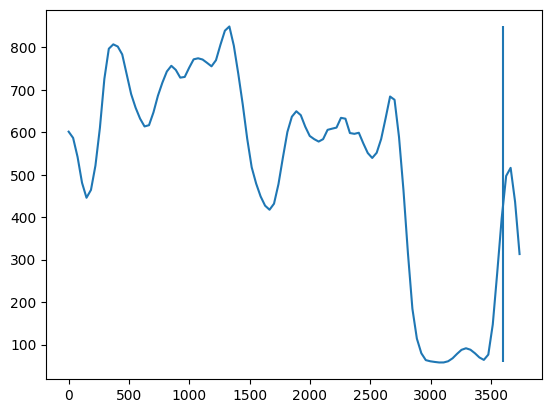

seizure1.0 1
[3731.573508]
FUnk
2019-10-04 19:14:02.426491650 2019-10-04 20:19:02.426491650


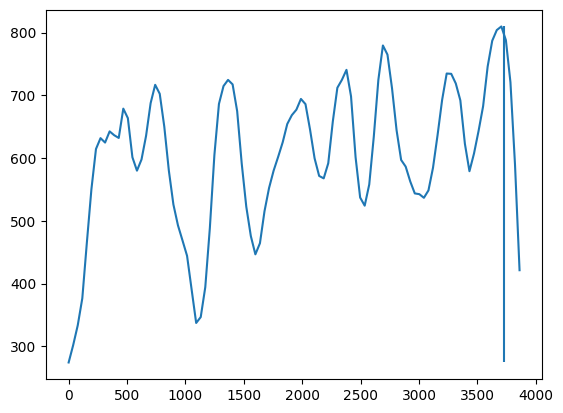

seizure2.0 2
[453.573508]
FUnk
2019-10-04 23:10:02.426491650 2019-10-04 23:22:32.426491650


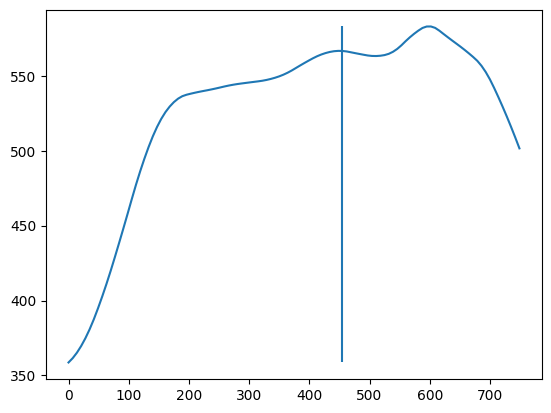

seizure3.0 3
[3223.573508]
FUnk
2019-10-04 23:23:02.426491650 2019-10-05 00:19:32.426491650


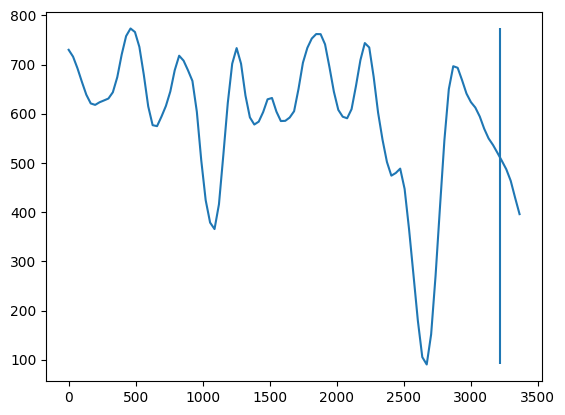

In [46]:
i = 0
feat = 'tinn'
for seiz in sorted(set(seizure_features['label'])):

    it = int(float(seiz.split('seizure')[-1]))
    print(seiz, it)
    seiz_table = seizure_features.loc[seizure_features['label']==seiz]
    xrange = (seiz_table['t0'] - seiz_table['t0'].iloc[0]).astype('timedelta64[s]')
    try:
        f = interp1d(x=xrange, y= smooth((seiz_table[feat].values)), kind='quadratic')
        xnew = np.arange(0, xrange.iloc[-1], int(xrange.iloc[-1]/100))
        ynew = f(xnew)
    # plt.plot(seiz_seg['t0'], smooth(standardise(seiz_seg['lf_hf'].values)))
        plt.plot(xnew, ynew)
    except:
        plt.plot(seiz_table['t0'], seiz_table[feat])

    seiz_dates = [(sd-seiz_table['t0'].iloc[0]).total_seconds() for sd in seizure_dates if (sd < seiz_table['t0'].iloc[-1]) & (sd > seiz_table['t0'].iloc[0])]
    print(seiz_dates)
    print(seizures.iloc[it]['ILAE'])
    print(seiz_table['t0'].iloc[0], seiz_table['t0'].iloc[-1])

    plt.vlines(seiz_dates, ynew.min(), ynew.max())
    plt.show()


In [59]:
seizure_dates

0   2020-09-22 21:05:54
1   2020-09-24 01:31:33
2   2020-09-24 03:34:11
3   2020-09-24 05:31:12
4   2020-09-24 06:35:29
5   2020-09-24 07:37:54
6   2020-09-25 05:02:36
Name: Date, dtype: datetime64[ns]

seizure1.0 1


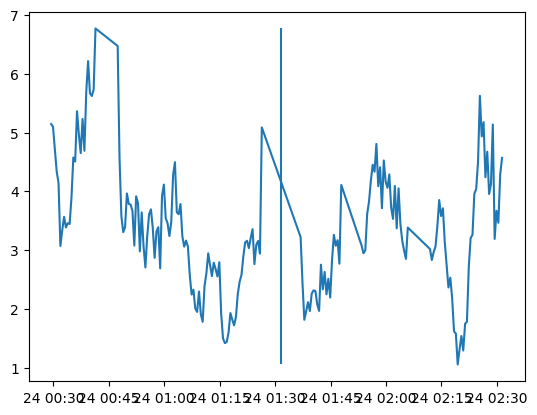

seizure5.0 5


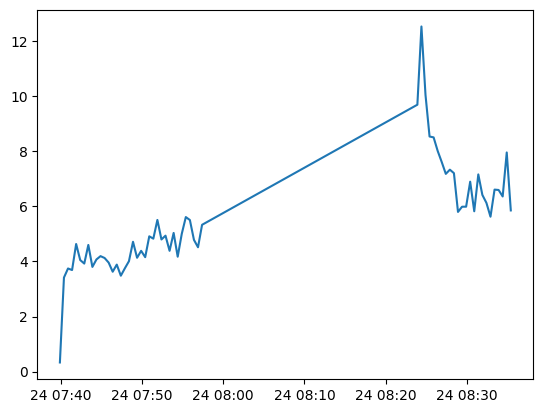

seizure2.0 2


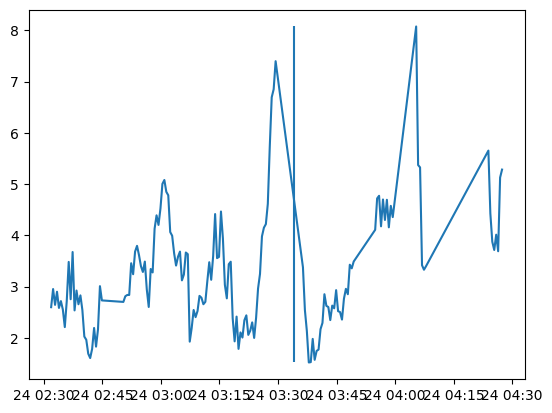

seizure6.0 6


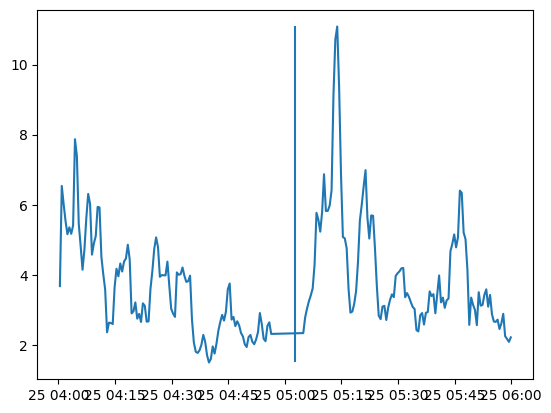

seizure0.0 0


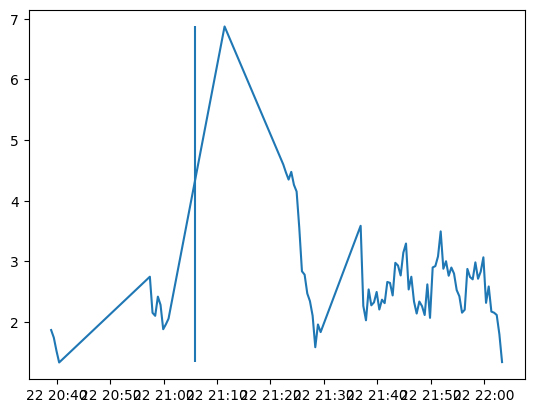

seizure3.0 3


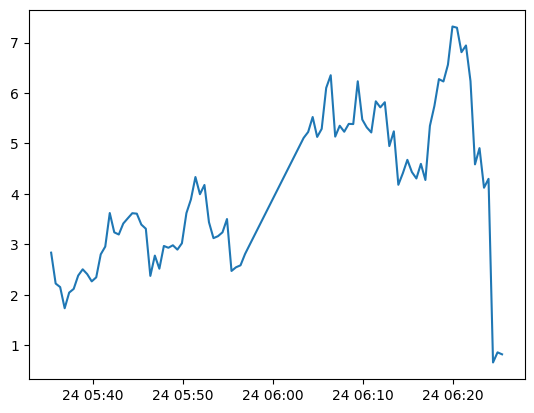

seizure4.0 4


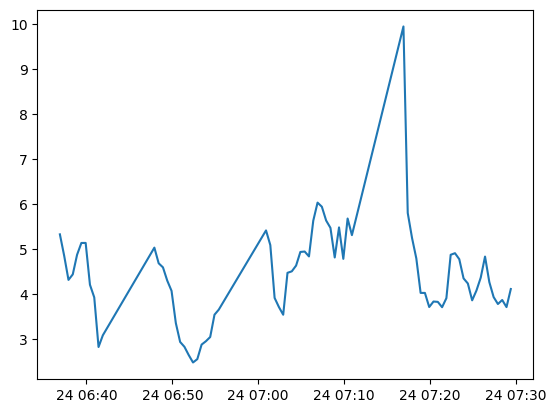

In [26]:
i = 0
for seiz in set(seizure_features['label']):

    it = int(float(seiz.split('seizure')[-1]))
    print(seiz, it)
    seiz_table = seizure_features.loc[seizure_features['label']==seiz]
    seiz_dates = [sd for sd in seizure_dates if (sd < seiz_table['t0'].iloc[-1]) & (sd > seiz_table['t0'].iloc[0])]
    plt.plot(seiz_table['t0'], seiz_table['lf_hf'])
    plt.vlines(seiz_dates, seiz_table['lf_hf'].min(), seiz_table['lf_hf'].max())
    plt.show()


In [14]:
seizure_dates

0   2020-09-22 21:05:54
1   2020-09-24 01:31:33
2   2020-09-24 03:34:11
3   2020-09-24 05:31:12
4   2020-09-24 06:35:29
5   2020-09-24 07:37:54
6   2020-09-25 05:02:36
Name: Date, dtype: datetime64[ns]